<a href="https://colab.research.google.com/github/Mhtag/Feature-Selection/blob/main/Feature_Selection_with_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will remove the features that are highly correlated

In [44]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target

In [46]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
X = df.drop('MEDV', axis=1)
y = df.MEDV

In [48]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=7)

X_train.shape, X_test.shape

((379, 13), (127, 13))

## Correlation

In [50]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.195839,0.398528,-0.070037,0.435017,-0.215245,0.336887,-0.374575,0.642093,0.591329,0.293310,-0.323788,0.486275
ZN,-0.195839,1.000000,-0.521795,-0.017611,-0.511829,0.320698,-0.555404,0.662060,-0.303648,-0.296264,-0.412243,0.164155,-0.406033
INDUS,0.398528,-0.521795,1.000000,0.037612,0.755142,-0.404662,0.633601,-0.699294,0.570106,0.700801,0.398919,-0.333455,0.607686
CHAS,-0.070037,-0.017611,0.037612,1.000000,0.028809,0.099307,0.064043,-0.075471,-0.072553,-0.101938,-0.162136,0.072239,-0.071221
NOX,0.435017,-0.511829,0.755142,0.028809,1.000000,-0.341816,0.724127,-0.767767,0.594483,0.649699,0.179043,-0.351337,0.596209
RM,-0.215245,0.320698,-0.404662,0.099307,-0.341816,1.000000,-0.230988,0.234128,-0.222929,-0.304788,-0.363335,0.126473,-0.647697
AGE,0.336887,-0.555404,0.633601,0.064043,0.724127,-0.230988,1.000000,-0.739869,0.431571,0.477503,0.242395,-0.240387,0.598680
DIS,-0.374575,0.662060,-0.699294,-0.075471,-0.767767,0.234128,-0.739869,1.000000,-0.482502,-0.512539,-0.256989,0.273256,-0.499417
RAD,0.642093,-0.303648,0.570106,-0.072553,0.594483,-0.222929,0.431571,-0.482502,1.000000,0.900225,0.458793,-0.437867,0.496622
TAX,0.591329,-0.296264,0.700801,-0.101938,0.649699,-0.304788,0.477503,-0.512539,0.900225,1.000000,0.456012,-0.428119,0.545381


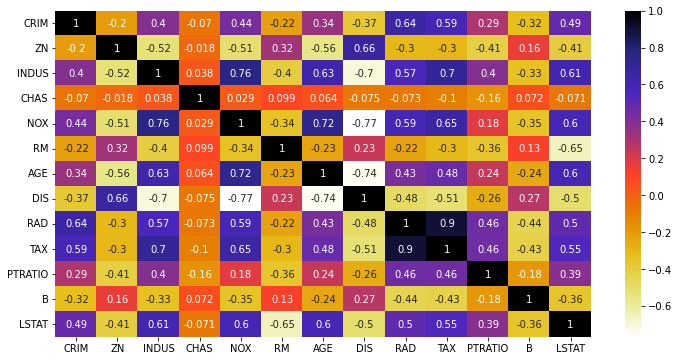

In [51]:

import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(X_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [52]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [53]:
corr_features = correlation(X_train, 0.7)
corr_features

{'AGE', 'NOX', 'TAX'}

In [54]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
357,3.84970,0.0,18.10,1.0,6.395,2.5052,24.0,20.2,391.34,13.27
337,0.03041,0.0,5.19,0.0,5.895,5.6150,5.0,20.2,394.81,10.56
327,0.24103,0.0,7.38,0.0,6.083,5.4159,5.0,19.6,396.90,12.79
13,0.62976,0.0,8.14,0.0,5.949,4.7075,4.0,21.0,396.90,8.26
418,73.53410,0.0,18.10,0.0,5.957,1.8026,24.0,20.2,16.45,20.62
...,...,...,...,...,...,...,...,...,...,...
221,0.40771,0.0,6.20,1.0,6.164,3.0480,8.0,17.4,395.24,21.46
98,0.08187,0.0,2.89,0.0,7.820,3.4952,2.0,18.0,393.53,3.57
435,11.16040,0.0,18.10,0.0,6.629,2.1247,24.0,20.2,109.85,23.27
40,0.03359,75.0,2.95,0.0,7.024,5.4011,3.0,18.3,395.62,1.98


In [55]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle competitions download -c santander-customer-satisfaction

  0% 0.00/4.05M [00:00<?, ?B/s]
100% 4.05M/4.05M [00:00<00:00, 57.5MB/s]
  0% 0.00/4.02M [00:00<?, ?B/s]
100% 4.02M/4.02M [00:00<00:00, 132MB/s]
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [56]:
!unzip \*.zip && rm *.zip  # Unzipping the file

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

2 archives were successfully processed.


In [57]:
df = pd.read_csv('train.csv', nrows=10000)
df.shape

(10000, 371)

In [58]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [59]:
X = df.drop('TARGET', axis=1)
y = df.TARGET

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=14)
X_train.shape, X_test.shape

((7500, 370), (2500, 370))

In [61]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [62]:
corr_feature = correlation(X_train, 0.9)
corr_feature

{'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var33',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_var13_ult1',
 'num_aport_var17_ult1',
 'num_aport_var33_

In [65]:
list(corr_feature)

['ind_var39',
 'num_var13_corto_0',
 'num_compra_var44_hace3',
 'num_op_var39_efect_ult1',
 'num_var13',
 'delta_num_venta_var44_1y3',
 'ind_var8',
 'num_var1',
 'num_var13_largo',
 'ind_var37_0',
 'num_aport_var33_ult1',
 'ind_var37',
 'num_var35',
 'num_var37',
 'num_var39',
 'delta_num_trasp_var17_in_1y3',
 'saldo_medio_var12_ult3',
 'imp_aport_var33_hace3',
 'num_var29_0',
 'saldo_medio_var33_hace3',
 'ind_var13_largo',
 'delta_num_trasp_var33_in_1y3',
 'imp_op_var40_comer_ult3',
 'num_aport_var13_ult1',
 'num_var26',
 'num_op_var39_comer_ult1',
 'saldo_var40',
 'num_var8',
 'num_var17',
 'num_op_var41_ult3',
 'num_op_var41_comer_ult3',
 'num_var5_0',
 'num_var8_0',
 'ind_var20',
 'num_aport_var33_hace3',
 'saldo_var24',
 'ind_var13_corto_0',
 'saldo_var32',
 'num_op_var40_ult3',
 'num_meses_var8_ult3',
 'num_meses_var13_corto_ult3',
 'num_reemb_var13_ult1',
 'delta_num_compra_var44_1y3',
 'num_var45_hace2',
 'saldo_medio_var13_largo_ult3',
 'ind_var26_cte',
 'num_var37_0',
 'saldo

In [68]:
X_train.drop(list(corr_feature), axis=1).shape


(7500, 219)